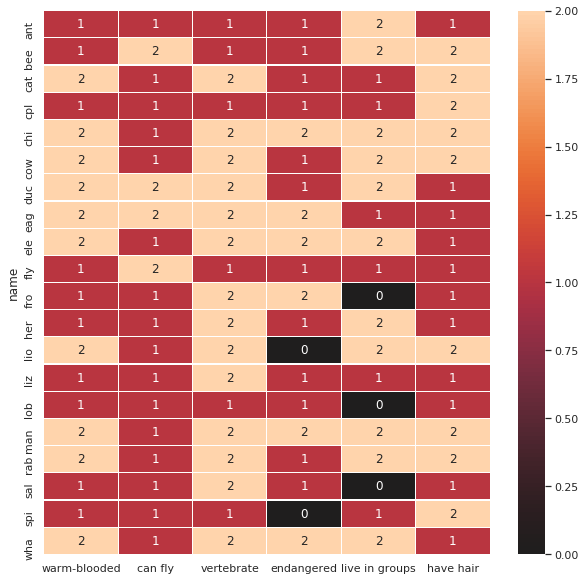

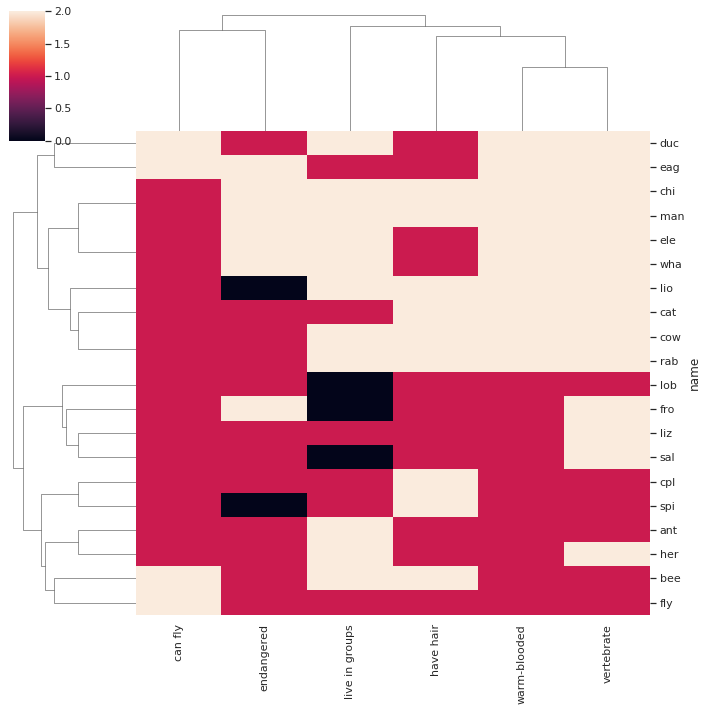

In [9]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

animals_raw = pd.read_csv("animals.csv")
animals_raw.columns = ("name","warm-blooded","can fly","vertebrate","endangered","live in groups","have hair")
animals_raw.fillna(0, inplace=True)

animals_edit = animals_raw.set_index(animals_raw.loc[:, "name"])
animals = animals_edit.loc[:, "warm-blooded":"have hair"]

# HEATMAP
fig, ax = plt.subplots(1,1, figsize=(10,10))
sb.set(color_codes=True)
ax = sb.heatmap(animals, annot=True, center=0, linewidths=.2)

#CLUSTERMAP
sb.clustermap(data=animals)

In [35]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans
from collections import Counter
from itertools import combinations as comb
from sklearn.metrics import accuracy_score

iris = sb.load_dataset("iris")
Counter(iris['species']).keys()               # 3 rozne gatunki - 3 klastry

print(iris)

species_kolumna = iris.pop("species")
species_list = []

for i in range(len(species_kolumna)):
    if species_kolumna[i] == "setosa":
        species_list.append(1)
    elif species_kolumna[i] == "versicolor":
        species_list.append(0)
    elif species_kolumna[i] == "virginica":
        species_list.append(2)
        

columns_list = []
scores_list = []

for zestaw in comb(iris.columns, 2):
    columns_list.append(str(zestaw[0])+" i "+str(zestaw[1]))
    iris_kolumny = iris[[zestaw[0], zestaw[1]]]
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X=iris_kolumny)
    predict_kmeans = kmeans.predict(iris.loc[:, [zestaw[0], zestaw[1]]])
    scores_list.append(accuracy_score(species_list, predict_kmeans))
    #print(kmeans.cluster_centers_)

kombinacje = list(comb(range(4), 3))

for zestaw in comb(iris.columns, 3):
    columns_list.append(str(zestaw[0])+", "+str(zestaw[1])+" i "+str(zestaw[2]))
    iris_kolumny = iris[[zestaw[0], zestaw[1], zestaw[2]]]
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X=iris_kolumny)
    predict_kmeans = kmeans.predict(iris.loc[:, [zestaw[0], zestaw[1], zestaw[2]]])
    scores_list.append(accuracy_score(species_list, predict_kmeans))
    #print(kmeans.cluster_centers_)
    
kombinacje = list(comb(range(4), 4))

for zestaw in comb(iris.columns, 4):
    columns_list.append(str(zestaw[0])+", "+str(zestaw[1])+", "+str(zestaw[2])+" i "+str(zestaw[3]))
    iris_kolumny = iris[[zestaw[0], zestaw[1], zestaw[2], zestaw[3]]]
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X=iris_kolumny)
    predict_kmeans = kmeans.predict(iris.loc[:, [zestaw[0], zestaw[1], zestaw[2], zestaw[3]]])
    scores_list.append(accuracy_score(species_list, predict_kmeans))
    #print(kmeans.cluster_centers_)

results = pd.DataFrame(scores_list, columns={"Wynik testu"}, index=columns_list)
results

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


Wynik testu
sepal_length i sepal_width                             0.100000
sepal_length i petal_length                            0.093333
sepal_length i petal_width                             0.493333
sepal_width i petal_length                             0.273333
sepal_width i petal_width                              0.040000
petal_length i petal_width                             0.026667
sepal_length, sepal_width i petal_length               0.246667
sepal_length, sepal_width i petal_width                0.233333
sepal_length, petal_length i petal_width               0.240000
sepal_width, petal_length i petal_width                0.380000
sepal_length, sepal_width, petal_length i petal...     0.440000